<center><font size=8>Hands-on - Introduction to Neural Networks</font></center>

## Data Description

- The MNIST (Modified National Institute of Standards and Technology) dataset is one of the most popular datasets used in machine learning and deep learning

- It contains 70,000 handwritten images of the digits from 0 to 9

- Each image is of 28x28 dimension and is represented using pixels values between 0 and 255, where
    - 0 stands for black
    - 255 stands for white

## Installing and importing the necessary libraries

In [ ]:
#Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.23.5 pandas==1.5.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you p

In [ ]:
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.

from sklearn.model_selection import train_test_split  # Function for splitting datasets for training and testing.

import time  # Module for time-related operations.

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense   # for creating fully connected neural network layers.

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

## Loading the data

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# uncomment the following lines if Google Drive is being used
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/new_preprocessed_data.csv")
stock = pd.read_csv("/content/drive/My Drive/data/stock_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/data/stock_data.csv'

In [15]:
df.head()

,loan_status,Principal,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,terms_7,terms_15,terms_30
0,0,1000,45,0,1,0,0,0,1,0,0,1
1,0,1000,50,1,0,0,0,1,0,0,0,1
2,0,1000,33,1,0,0,0,1,0,0,0,1
3,0,1000,27,0,0,0,1,0,1,0,1,0
4,0,1000,28,0,0,0,1,1,0,0,0,1


In [ ]:
df.shape

(500, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   loan_status                     500 non-null    int64
 1   Principal                       500 non-null    int64
 2   age                             500 non-null    int64
 3   education_Bechalor              500 non-null    int64
 4   education_High School or Below  500 non-null    int64
 5   education_Master or Above       500 non-null    int64
 6   education_college               500 non-null    int64
 7   Gender_female                   500 non-null    int64
 8   Gender_male                     500 non-null    int64
 9   terms_7                         500 non-null    int64
 10  terms_15                        500 non-null    int64
 11  terms_30                        500 non-null    int64
dtypes: int64(12)
memory usage: 47.0 KB


In [ ]:
df.loan_status.nunique()

3

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Separate independent (X) and dependent (y) features
X = df.drop(columns=['loan_status'])  # Adjust column name if needed
y = df['loan_status']

# Convert target variable to categorical format
y_categorical = to_categorical(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer
])

# Compile the model
optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# time.time() returns the time in seconds since Thu Jan 1 00:00:00 1970.
start = time.time()
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Get training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy:.4f}")

# time.time() returns the time in seconds since Thu Jan 1 00:00:00 1970.
end = time.time()

# Predicting on Test data
y_pred=model.predict(X_test)

# Instead of argmax, keep the predictions as probabilities
# y_pred_final = np.argmax(y_pred, axis=1)  # This was causing the error

# Use a threshold to convert probabilities to binary predictions (0 or 1)
y_pred_final = (y_pred > 0.5).astype(int)

# If y_test is one-hot encoded, convert it to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_labels, y_pred_final[:,0])) # Assuming binary classification


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1604 - loss: 302.8617 - val_accuracy: 0.2250 - val_loss: 167.4550
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1666 - loss: 166.1032 - val_accuracy: 0.2250 - val_loss: 57.9927
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2171 - loss: 44.0199 - val_accuracy: 0.5625 - val_loss: 21.0426
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6519 - loss: 19.4332 - val_accuracy: 0.5625 - val_loss: 20.4787
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6161 - loss: 11.1665 - val_accuracy: 0.2375 - val_loss: 6.3504
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2863 - loss: 5.7016 - val_accuracy: 0.3500 - val_loss: 3.8364
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4054 - loss: 2.6932 - val_accuracy: 0.4000 - val_loss: 1.3622
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4695 - loss: 1.7378 - val_accuracy: 0.4500 - val_l

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.24      1.00      0.39        24
           2       0.00      0.00      0.00        24

    accuracy                           0.24       100
   macro avg       0.08      0.33      0.13       100
weighted avg       0.06      0.24      0.09       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  9.671726703643799


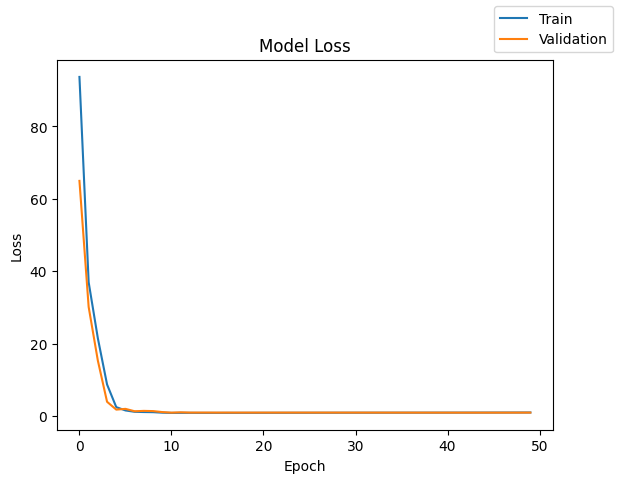

In [ ]:
plot(history,'loss')

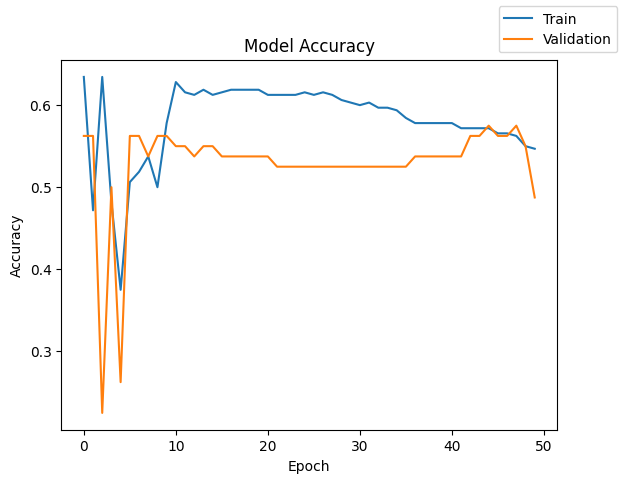

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[0] = [0,'-','-',10,50000,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,1.093385,1.062382,0.546875,0.4875,9.67


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Predict on training data
y_train_pred = model.predict(X_train)

# Convert probabilities to class labels
y_train_pred_labels = np.argmax(y_train_pred, axis=1)
y_train_labels = np.argmax(y_train, axis=1)

# Compute F1 score
train_f1_score = f1_score(y_train_labels, y_train_pred_labels, average='weighted')
print(f"Training F1 Score: {train_f1_score:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training F1 Score: 0.4772


In [ ]:
# Model Building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, losses
# Initializing the model
model_2 = keras.Sequential()
# Adding input layer
model_2.add(Dense(64, activation='relu',input_shape=(11,)))
# Adding first hidden layer
model_2.add(Dense(32, activation='relu'))
# Adding output layer
model_2.add(Dense(3, activation='softmax'))
# Use 'learning_rate' instead of 'lr'
SGD = optimizers.SGD(learning_rate=1e-3)
# compiling the model
model_2.compile(loss=losses.categorical_crossentropy, optimizer=SGD, metrics=['accuracy'])
# fitting the model
history_2=model_2.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=128, verbose=2)
# Prediction on test
y_pred_2=model_2.predict(X_test)
# Applying argmax function
y_pred_final_2=[]
for i in y_pred_2:
 y_pred_final_2.append(np.argmax(i))
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final_2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3/3 - 2s - 532ms/step - accuracy: 0.3438 - loss: 239.7522 - val_accuracy: 0.5625 - val_loss: 47.9021
Epoch 2/100
3/3 - 0s - 32ms/step - accuracy: 0.4812 - loss: 40.1892 - val_accuracy: 0.5625 - val_loss: 11.0443
Epoch 3/100
3/3 - 0s - 27ms/step - accuracy: 0.4844 - loss: 12.7462 - val_accuracy: 0.2125 - val_loss: 8.1590
Epoch 4/100
3/3 - 0s - 46ms/step - accuracy: 0.4469 - loss: 10.1376 - val_accuracy: 0.2250 - val_loss: 3.9667
Epoch 5/100
3/3 - 0s - 45ms/step - accuracy: 0.4344 - loss: 4.5428 - val_accuracy: 0.5625 - val_loss: 2.3520
Epoch 6/100
3/3 - 0s - 46ms/step - accuracy: 0.6344 - loss: 1.4950 - val_accuracy: 0.5625 - val_loss: 1.2757
Epoch 7/100
3/3 - 0s - 49ms/step - accuracy: 0.6344 - loss: 1.0150 - val_accuracy: 0.5625 - val_loss: 1.1031
Epoch 8/100
3/3 - 0s - 27ms/step - accuracy: 0.6344 - loss: 0.9382 - val_accuracy: 0.5625 - val_loss: 1.0679
Epoch 9/100
3/3 - 0s - 47ms/step - accuracy: 0.6344 - loss: 0.9292 - val_accuracy: 0.5625 - val_loss: 1.0667
Epoch 10/10

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Splitting data into features and target variable
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Standardizing the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])

# Compiling the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=200, batch_size=128, verbose=1)

# Evaluating the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=1)

print(f"Training Accuracy: {train_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3328 - loss: 0.6935
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3069 - loss: 0.6695
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3191 - loss: 0.6580
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3403 - loss: 0.6495
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3611 - loss: 0.6422
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3588 - loss: 0.6369
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3552 - loss: 0.6343
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3605 - loss: 0.6331
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3620 - loss: 0.6322
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3582 - loss: 0.6303
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3713 - loss: 0.6276
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3797 - lo

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd


# Splitting data into features and target variable (Do not scale as per instructions)
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Splitting into training and testing sets (Do not use stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])

# Compiling the model with SGD optimizer
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=1)

# Making predictions on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generating classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extracting precision for class 0
precision_class_0 = report['0']['precision']
print(f"Precision for the 0th class: {precision_class_0:.4f}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3342 - loss: 115.8726
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2720 - loss: 31.1946 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4032 - loss: 8.0777 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3272 - loss: 5.1073 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3332 - loss: 1.7492 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3342 - loss: 2.3815 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3342 - loss: 2.2964 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3342 - loss: 1.9729 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3342 - loss: 1.2778 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3342 - loss: 1.3687
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1914 - loss: 0.6954 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1914 - loss: 0.685

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Loading the dataset from tensorflow datasets.
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Data Overview

In [ ]:
#Printing the shape of the data.
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**Let's check the images for different digits.**

NameError: name 'x_train' is not defined

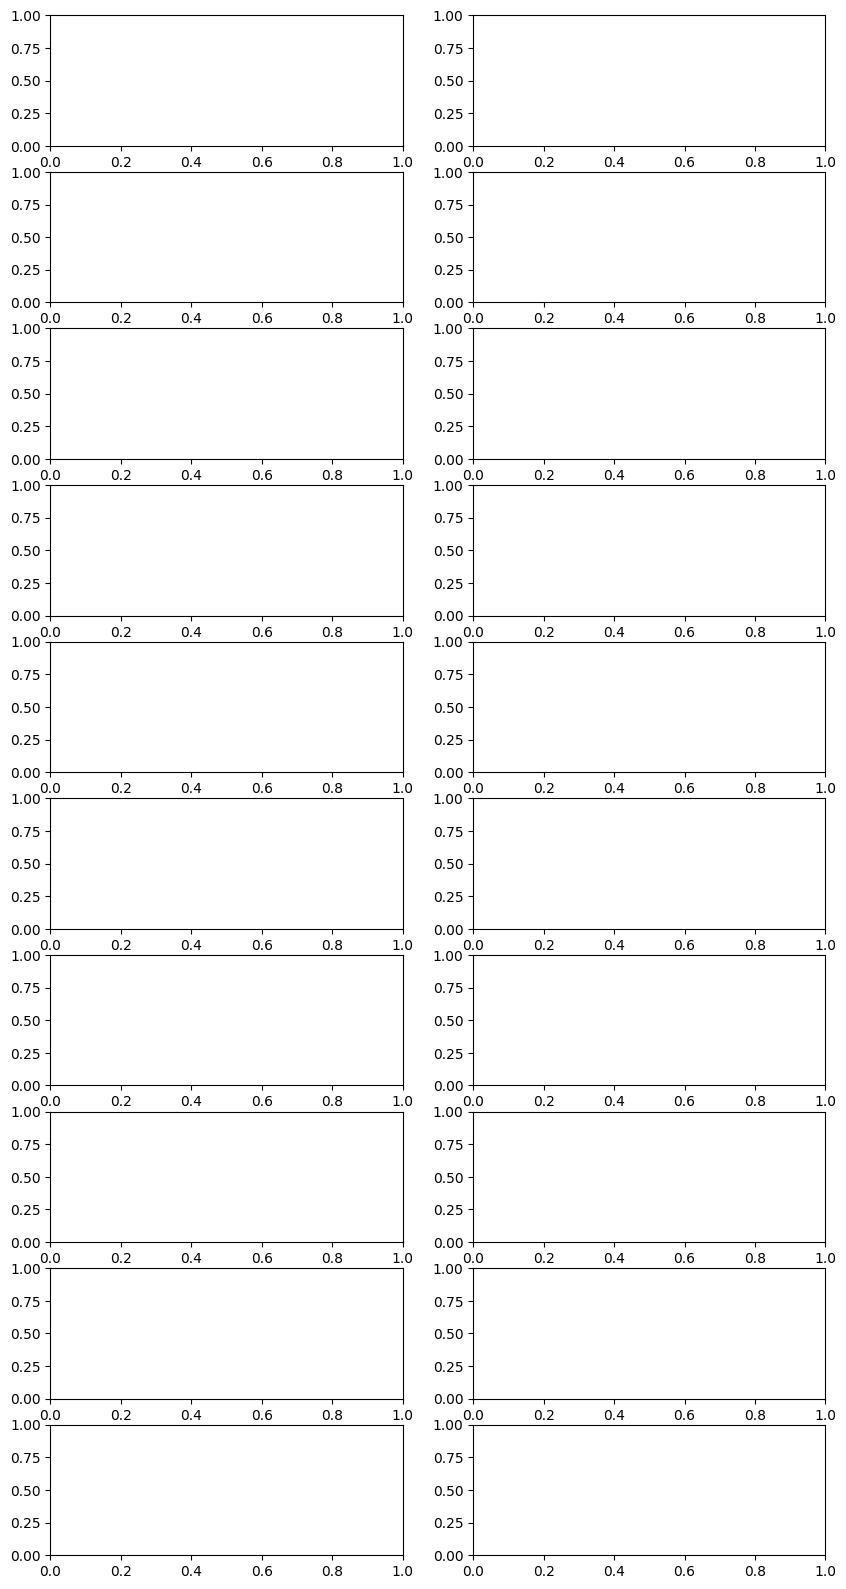

In [ ]:
f, axarr = plt.subplots(10,2,figsize=(10, 20)) #Grid of size 10*20, with 10 rows and 2 columns
for i in range(10): #For each digit
    images = x_train[y_train==i] #Filtering all the images based on the digit.
    axarr[i,0].imshow(images[0],cmap="gray") #Plotting the first one.
    axarr[i,1].imshow(images[1],cmap="gray") #Plotting the second one.
    axarr[i,0].axis('off')  # Hide axes
    axarr[i,1].axis('off')  # Hide axes
    axarr[i,0].set_title(str(i)) #Setting the title as the label of the digit.
    axarr[i,1].set_title(str(i)) #Setting the title as the label of the digit.

plt.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots
plt.show() #Displaying the plot.

**Let's check the distribution of images across different classes.**

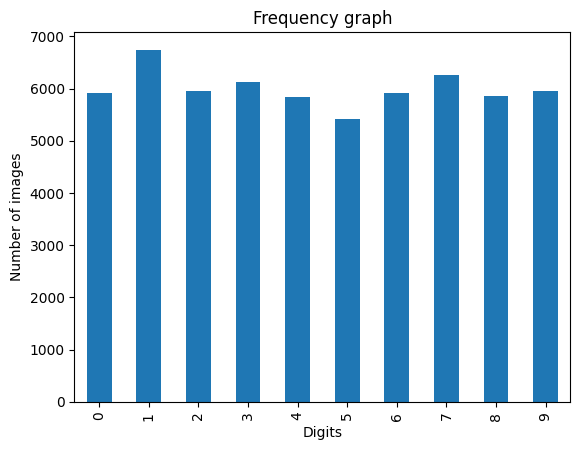

In [ ]:
# frequency plot of the dependent variable in the training dataset
(pd.Series(y_train).value_counts())[[0,1,2,3,4,5,6,7,8,9]].plot.bar()
plt.title("Frequency graph") #Setting the title
plt.xlabel("Digits") #Defining the label for the x-axis
plt.ylabel("Number of images") #Defining the label for the y-axis.
plt.show() #Displaying the plot.

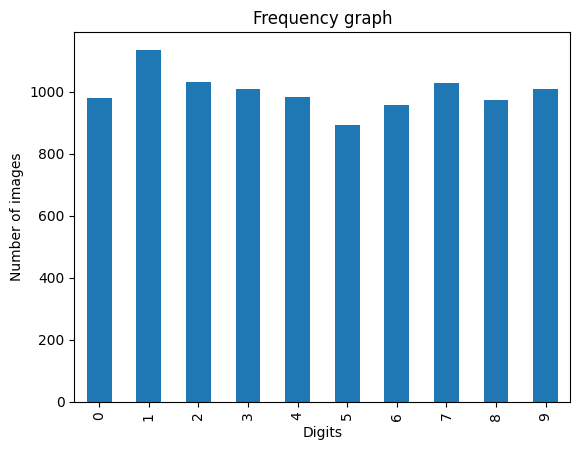

In [ ]:
# frequency plot of the dependent variable in the test dataset
(pd.Series(y_test).value_counts())[[0,1,2,3,4,5,6,7,8,9]].plot.bar()
plt.title("Frequency graph") #Setting the title
plt.xlabel("Digits") #Defining the label for the x-axis
plt.ylabel("Number of images") #Defining the label for the y-axis.
plt.show() #Displaying the plot.

## Data Preprocessing

### Data Preparation for Modeling

In [ ]:
# Splitting the training dataset in the ratio 5:1 for train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1-(5/6), random_state=42,stratify=y_train)

In [ ]:
#Printing the shape of the dataset.
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)


### Data Scaling

In [ ]:
#Printing the maximum value and the minimum value of the independent variable.
print(x_train.max(),x_test.max(),x_val.max())
print(x_train.min(),x_test.min(),x_val.min())

255 255 255
0 0 0


In [ ]:
# Normalizing the dataset
x_train, x_val, x_test = x_train.astype("float32")/(255), x_val.astype("float32")/(255), x_test.astype("float32")/(255)

In [ ]:
#Printing the maximum value and the minimum value of the independent variable.
print(x_train.max(),x_test.max(),x_val.max())
print(x_train.min(),x_test.min(),x_val.min())

1.0 1.0 1.0
0.0 0.0 0.0


- Previously, the range was $[0,255]$
- Now, the range after normalizing is $[0,1]$

### Reshaping the input

We need to reshape the image data from $(n,h,w)$ to $(n,h*w)$, where

- $n$ = number of images in the dataset
- $h$ = height of the image
- $w$ = width of the image

For example, image data of dimension $(50000,28,28)$ is transformed to $(50000,28*28)$, i.e., $(50000,784)$.

In [ ]:
#Reshaping the image data
x_train = x_train.reshape(x_train.shape[0],-1)
x_val = x_val.reshape(x_val.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

In [ ]:
print(x_train.shape[0], "train samples")
print(x_val.shape[0], "validation samples")
print(x_test.shape[0], "test samples")

50000 train samples
10000 validation samples
10000 test samples


### Encoding the target variable

In [ ]:
# specifying the number of classes
num_classes = 10

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [ ]:
#Displaying the updated class labels
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

- Each row in the matrix is now a one-hot encoded vector of 10 dimensions
- The value will be 1 for the entry (dimension) corresponding true class and 0 elsewhere

### Utility functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

We'll create a dataframe to store the results from all the models we build

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer","# epochs","batch size","train loss","validation loss","train accuracy","validation accuracy","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

## Model Building

### Model 0

- Let's start with a baseline model having an input layer, an output layer, and no hidden layers.
- We'll use vanilla Gradient Descent as the optimizer.
- We'll set epochs to 10, which means the model will pass over the entire data 10 times

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# initializing the neural network
model = Sequential()

# Adding a dense layer with softmax activation function, with the input dimension determined by the shape of the training data.
model.add(Dense(num_classes, activation = 'softmax', input_dim = x_train.shape[1]))

Let's go over the arguments of the function used above:

- `num_classes`:  Positive integer, dimensionality of the output vector. In this case, it is 10.

- `activation`: Activation function to use. If nothing is specified, no activation is applied (i.e., "linear" activation: $a(x) = x$).

- `input_dim`: Positive integer, dimensionality of the input vector. In this case, it is 784.

**Note**: We do not have to explicitly add an input layer. Once we initialize a neural network using `Sequential()`, it automatically assigns a default input layer. We just define an output layer and connect it to the predefined input layer.

In [ ]:
#Printing the summary.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

- `Layer (type): dense (Dense)`
    - Defines the type of neural network layer
    - Dense Layer is a simple layer of neurons in which each neuron receives input from all the neurons of previous layer (hence, the name dense)

- `Output shape: (None, 10)`
    - `None`: It indicates that this dimension is variable. If a number is specified, it indicates the batch size or the number of input vectors.
    - `10`: Number of neurons outputted by the layer
  
- `Param #: 7850`
    - Denotes the total number of parameters in the layer
    - The number of parameters is calculated as follows:
        - Input shape: (None, 784)
        - Output shape: (None, 10)
        - Each of the 784 neurons from the input is connected to each of the 10 neurons in the output. This gives us a total of 784*10, i.e., 7840 weight parameters
        - For each neuron in the output, there is a bias parameter assosciated, which gives us 10 bias parameters
        - Thus , the total number of parameters is 7840 + 10 = 7850

- Trainable parameters are weights and biases adjusted during training to improve model performance

- Non-trainable parameters, like hyperparameters or fixed operation parameters, remain unchanged and contribute to the model's architecture

- The current model has all trainable parameters

- Each parameter occupies some memory space. The total space occupied by the model parameters here is ~31KB

In [ ]:
#Compiling the model.
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
batch_size = x_train.shape[0]
epochs = 10

# time.time() returns the time in seconds since Thu Jan 1 00:00:00 1970.
start = time.time()

# Fitting the model.
history = model.fit(
    x_train, y_train,
    validation_data=(x_val,y_val),
    batch_size=batch_size,
    epochs=epochs
)

# time.time() returns the time in seconds since Thu Jan 1 00:00:00 1970.
end = time.time()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0724 - loss: 2.4184 - val_accuracy: 0.0749 - val_loss: 2.4064
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step - accuracy: 0.0750 - loss: 2.4036 - val_accuracy: 0.0784 - val_loss: 2.3921
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.0777 - loss: 2.3893 - val_accuracy: 0.0819 - val_loss: 2.3783
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.0804 - loss: 2.3754 - val_accuracy: 0.0847 - val_loss: 2.3649
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.0844 - loss: 2.3619 - val_accuracy: 0.0879 - val_loss: 2.3518
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.0879 - loss: 2.3487 - val_accuracy: 0.0912 - val_loss: 2.3390
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.0916 - loss: 2.3359 - val_accuracy: 0.0951 - val_loss: 2.3265
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.0961 - loss: 2.3234 - val_accuracy: 0.1005 - val_loss: 2.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  4.850769519805908


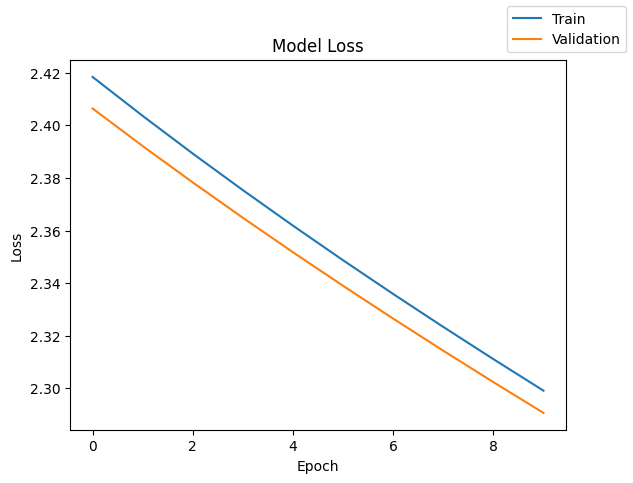

In [ ]:
plot(history,'loss')

- Both train and validation loss are decreasing linearly.

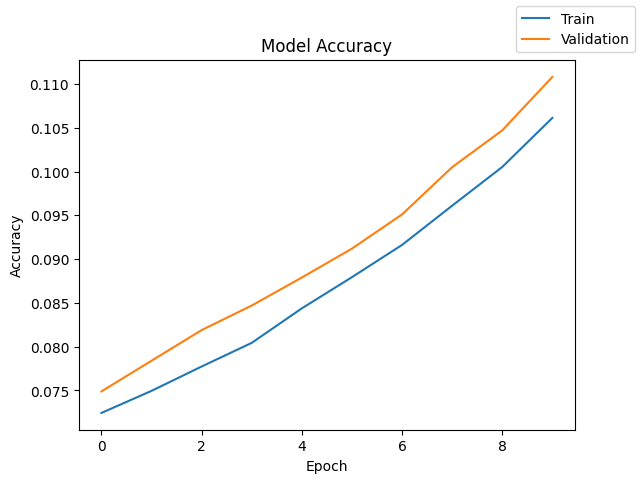

In [ ]:
plot(history,'accuracy')

- As accuracy is inversely proportional to the loss, the graph is linearly increasing.

In [ ]:
results.loc[0] = [0,'-','-',10,50000,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.299113,2.290647,0.10612,0.1108,4.85


- With the baseline model and 10 epochs, we were able to obtain an accuracy of 15%, which is very low

- ***How do we improve the performance?***

- We can allow the model to **run over the data more times**. This can be done by **increasing the number of epochs**.

- Let's try this out.

### Model 1

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(num_classes, activation = 'softmax', input_dim = x_train.shape[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = x_train.shape[0]
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step - accuracy: 0.0592 - loss: 2.4347 - val_accuracy: 0.0626 - val_loss: 2.4185
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.0623 - loss: 2.4213 - val_accuracy: 0.0664 - val_loss: 2.4053
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.0659 - loss: 2.4080 - val_accuracy: 0.0713 - val_loss: 2.3923
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.0697 - loss: 2.3950 - val_accuracy: 0.0752 - val_loss: 2.3795
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.0740 - loss: 2.3822 - val_accuracy: 0.0795 - val_loss: 2.3669
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.0784 - loss: 2.3696 - val_accuracy: 0.0844 - val_loss: 2.3545
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.0840 - loss: 2.3571 - val_accuracy: 0.0913 - val_loss: 2.3423
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.0896 - loss: 2.3449 - val_accuracy: 0.0978 - val_loss:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  15.655142307281494


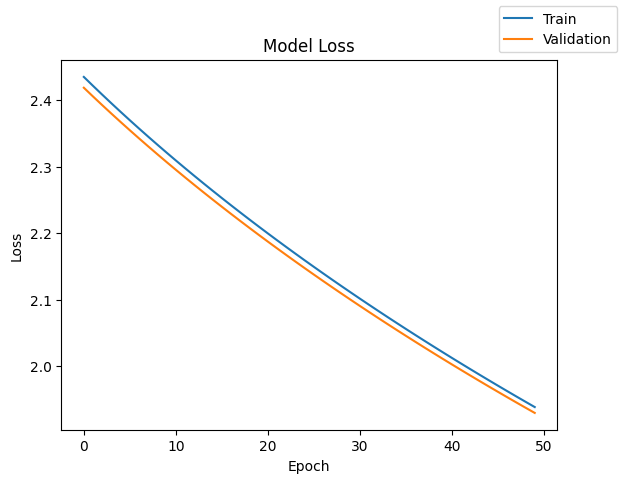

In [ ]:
plot(history,'loss')

- The apparently linear relationship between epochs and loss (as seen before) is slowly becoming non-linear now
    - We see a slight curvature in the plot here

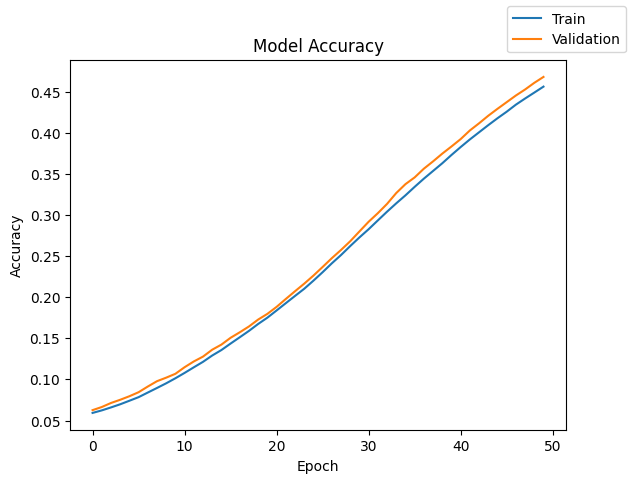

In [ ]:
plot(history,'accuracy')

- The non-linear relationship is more clearly visible here than before
- Note that the train accuracy (orange curve) remains below or equal to the validation accuracy (blue curve)

In [ ]:
results.loc[1]= [0,'-','-',50,50000,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.299113,2.290647,0.10612,0.1108,4.85
1,0,-,-,50,50000,1.938442,1.929622,0.45600,0.4678,15.66


- The accuracy has improved significantly compared to the previous model (~180%)
- The time taken to train has also increased.
- It is important to note that since we are using **vanilla Gradient Descent**, the **model parameters are updated once every epoch**
- We can use Stochastic Gradient Descent to update the model parameters more frequently in a single epoch
- Let's try this out



### Model 2

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(num_classes, activation = 'softmax', input_dim = x_train.shape[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 32
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6984 - loss: 1.2107 - val_accuracy: 0.8658 - val_loss: 0.5356
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8756 - loss: 0.4956 - val_accuracy: 0.8823 - val_loss: 0.4446
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8887 - loss: 0.4220 - val_accuracy: 0.8904 - val_loss: 0.4070
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8952 - loss: 0.3882 - val_accuracy: 0.8953 - val_loss: 0.3853
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8997 - loss: 0.3677 - val_accuracy: 0.8997 - val_loss: 0.3708
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9033 - loss: 0.3536 - val_accuracy: 0.9017 - val_loss: 0.3603
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9057 - loss: 0.3431 - val_accuracy: 0.9034 - val_loss: 0.3522
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9074 - loss: 0.3348 -

- The accuracy has improved by a significant margin.
- Note that after one epoch, we got an accuracy of 80%.
    - As we updated the model parameters more frequently (50000/32 = 1563 times) in a single epoch, our model was able to adjust to the data better
    - It took the same amount of time (~4s) for one epoch here vs 10 epochs previously. But the performance gain is much higher
    - This shows that the rate of learning from the data has improved

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  78.58397483825684


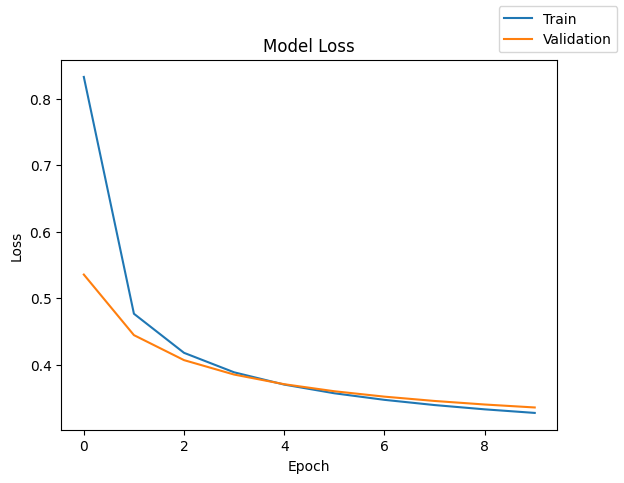

In [ ]:
plot(history,'loss')

- Until the 4th epoch, the validation loss is lesser than or equal to the train loss.

- After the 4th epoch, the validation loss is higher than the train loss.

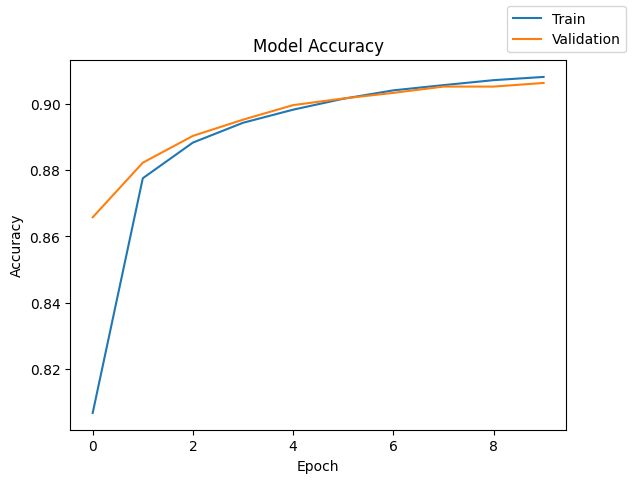

In [ ]:
plot(history,'accuracy')

- Here, after the 4th epoch, validation accuracy is lesser than or equal to the train accuracy.

**The divergence between the train and validation accuracies may hint that the model is slowly moving towards being an overfit model.**

In [ ]:
results.loc[2] = [0,'-','-',10,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.299113,2.290647,0.10612,0.1108,4.85
1,0,-,-,50,50000,1.938442,1.929622,0.45600,0.4678,15.66
2,0,-,-,10,32,0.327692,0.335881,0.90822,0.9064,78.58


- It is clear that using a smaller batch size improves the rate of learning.
    - We saw an ~100% improvement here

- Now, let's keep the batch size the same and increase the epochs to 50
   - We saw previously that more epochs result in more updates. So, we can expect an increase in accuracy.

### Model 3

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(num_classes, activation = 'softmax', input_dim = x_train.shape[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6973 - loss: 1.1910 - val_accuracy: 0.8660 - val_loss: 0.5391
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8746 - loss: 0.4972 - val_accuracy: 0.8825 - val_loss: 0.4467
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8872 - loss: 0.4229 - val_accuracy: 0.8903 - val_loss: 0.4087
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8938 - loss: 0.3888 - val_accuracy: 0.8964 - val_loss: 0.3868
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8995 - loss: 0.3682 - val_accuracy: 0.8983 - val_loss: 0.3721
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9028 - loss: 0.3540 - val_accuracy: 0.9017 - val_loss: 0.3615
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9055 - loss: 0.3434 - val_accuracy: 0.9032 - val_loss: 0.3533
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9073 - loss: 0.3351

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  368.06517815589905


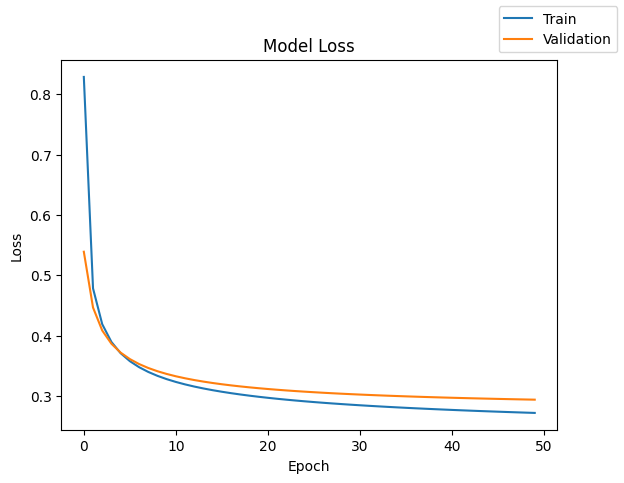

In [ ]:
plot(history,'loss')

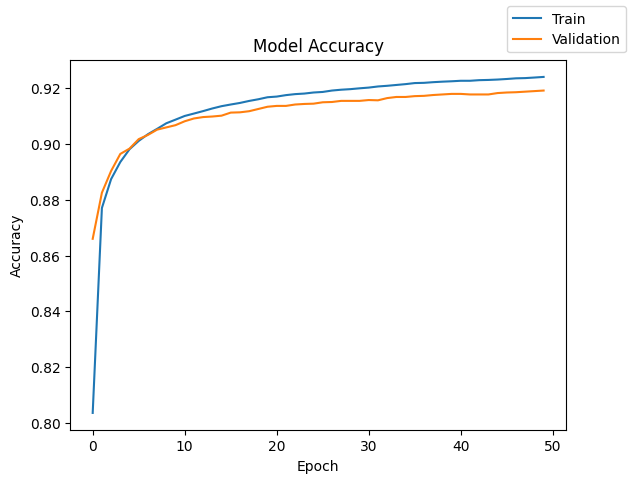

In [ ]:
plot(history,'accuracy')

- As seen previously, the train and validation losses (and accuracies) start to diverge after a few epochs
    - Here, it is ~5 epochs

- Also, after a point (somewhere between 20 and 30 epochs), the train and validation losses (and accuracies) start to plateau and show minimal change
    - This indicates that we might choose to not train the neural network beyond certain number of epochs as the performance gain might not be high

In [ ]:
results.loc[3] = [0,'-','-',50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.299113,2.290647,0.10612,0.1108,4.85
1,0,-,-,50,50000,1.938442,1.929622,0.45600,0.4678,15.66
2,0,-,-,10,32,0.327692,0.335881,0.90822,0.9064,78.58
3,0,-,-,50,32,0.272342,0.294275,0.92398,0.9191,368.07


- We can see some improvement in the overall accuracy, but it's not as great an improvement as we saw previously

- In fact, we took 5 times more time for a 2% accuracy gain

**Note**: This tradeoff may be feasible in certain cases but not in others. For example, in case of real-time predictions, one can choose to sacrifice a small performance gain for a much reduced prediction time.

- We saw that training longer doesn't really lead to a larger improvement in model performance
- Since we had a batch size of 32, the model parameters update was based on only these 32 samples
- ***What if we increase the number of samples based on which the updates are made?***
- Let's try increasing the batch size to 64.

### Model 4

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(num_classes, activation = 'softmax', input_dim = x_train.shape[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 64
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6331 - loss: 1.4373 - val_accuracy: 0.8480 - val_loss: 0.6723
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8573 - loss: 0.6165 - val_accuracy: 0.8674 - val_loss: 0.5317
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8731 - loss: 0.5048 - val_accuracy: 0.8768 - val_loss: 0.4751
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8820 - loss: 0.4547 - val_accuracy: 0.8821 - val_loss: 0.4429
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8879 - loss: 0.4248 - val_accuracy: 0.8869 - val_loss: 0.4216
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8920 - loss: 0.4044 - val_accuracy: 0.8907 - val_loss: 0.4061
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8953 - loss: 0.3893 - val_accuracy: 0.8945 - val_loss: 0.3942
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8977 - loss: 0.3776 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  174.0090754032135


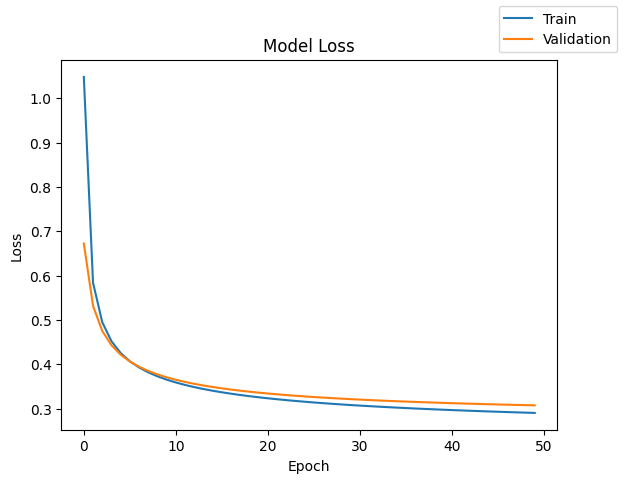

In [ ]:
plot(history,'loss')

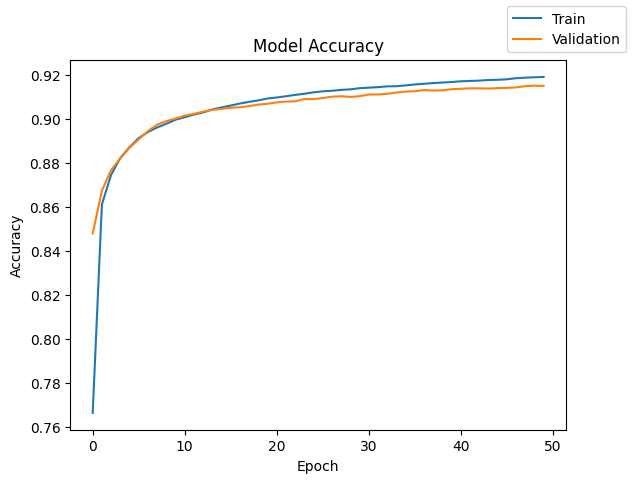

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[4] = [0,'-','-',50,64,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.299113,2.290647,0.10612,0.1108,4.85
1,0,-,-,50,50000,1.938442,1.929622,0.45600,0.4678,15.66
2,0,-,-,10,32,0.327692,0.335881,0.90822,0.9064,78.58
3,0,-,-,50,32,0.272342,0.294275,0.92398,0.9191,368.07
4,0,-,-,50,64,0.290062,0.307138,0.91908,0.9150,174.01


- The time to train the model has reduced by \~50%, and there is a minimal dip in the accuracy (\~1%).

- Note that the model accuracy after one epoch is \~75% now (vs \~80% when we set batch size to 32)

- But, after 10 epochs, the model accuracy is approx. the same (\~90% for batch size 64 vs \~91% for batch size 32)
    - Perhaps there are some noisy points that don't contribute positively even after increasing the batch size for a better weight updates.

- We haven't added a hidden layer to our neural network so far

- Let's try adding a hidden layer

- Also, let's compare vanilla gradient descent and stochastic gradient descent with the updated architecture (1 input + 1 hidden + 1 output).

### Model 5

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(64,activation='sigmoid',input_dim = x_train.shape[1]))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

- As the network has one hidden and one output layer, both being dense layers, the same is reflected in the model summary

- Let's understand the computation of the total number of parameters in the model
    - Each of the 784 input neurons is connected to the 64 neurons in the hidden layer
    - This gives us 784*64 = 50176 weight parameters and 64 bias parameters, totaling 50240 parameters for the connections between the input and hidden layers.
    - Each of the 64 neurons in the hidden layer is connected to the 10 neurons in the output layer.
    - This gives us 64*10 = 640 weight parameters and 10 bias parameters, totaling 650 parameters for the connections between the hidden and output layers.
    - Thus, the total number of parameters is 50240 + 650 = 50890

In [ ]:
batch_size = x_train.shape[0]
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step - accuracy: 0.1022 - loss: 2.5278 - val_accuracy: 0.1022 - val_loss: 2.5156
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.1022 - loss: 2.5135 - val_accuracy: 0.1022 - val_loss: 2.5023
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.1022 - loss: 2.5001 - val_accuracy: 0.1022 - val_loss: 2.4897
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.1022 - loss: 2.4876 - val_accuracy: 0.1022 - val_loss: 2.4780
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.1022 - loss: 2.4759 - val_accuracy: 0.1023 - val_loss: 2.4670
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.1022 - loss: 2.4648 - val_accuracy: 0.1022 - val_loss: 2.4565
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.1022 - loss: 2.4544 - val_accuracy: 0.1022 - val_loss: 2.4467
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.1022 - loss: 2.4446 - val_accuracy: 0.1022 - val_loss:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  15.47247052192688


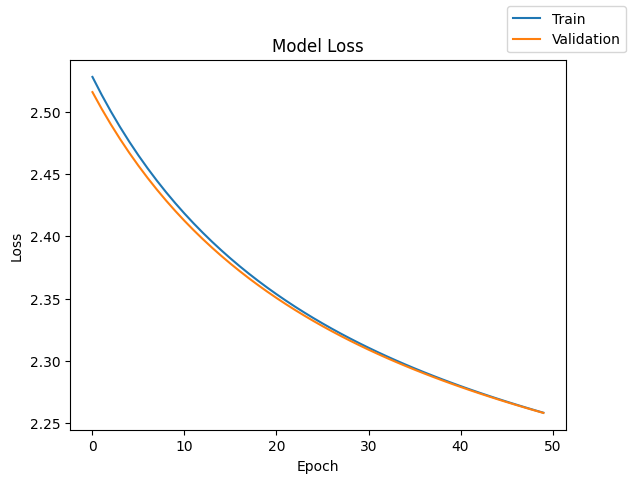

In [ ]:
plot(history,'loss')

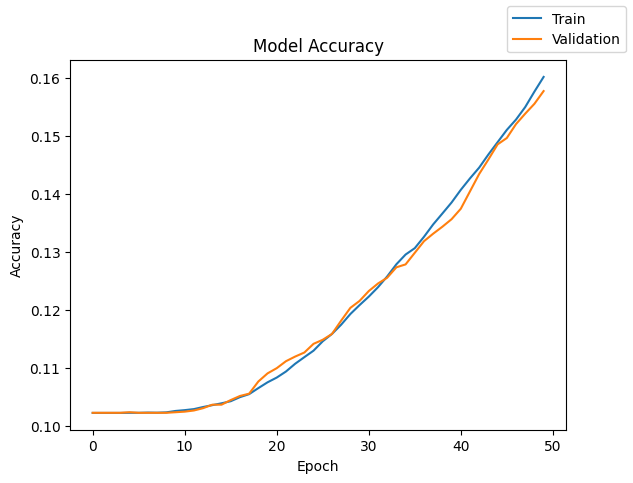

In [ ]:
plot(history,'accuracy')

- In this case, the validation loss is always lesser than the training loss.

- Consequently, the validation accuracy is always higher than the training accuracy.

In [ ]:
results.loc[5] = [1,64,'sigmoid',50,50000,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.299113,2.290647,0.10612,0.1108,4.85
1,0,-,-,50,50000,1.938442,1.929622,0.45600,0.4678,15.66
2,0,-,-,10,32,0.327692,0.335881,0.90822,0.9064,78.58
3,0,-,-,50,32,0.272342,0.294275,0.92398,0.9191,368.07
4,0,-,-,50,64,0.290062,0.307138,0.91908,0.9150,174.01
5,1,64,sigmoid,50,50000,2.258370,2.258207,0.16014,0.1577,15.47


- From the above results table, it's clear that the model isn't performing well
    - We got better performance with no hidden layers (index 1 vs index 5)

- It seems that just adding a hidden layer isn't improving the model performance.

- Let's check if reducing the batch size to 32 (i.e., implementing stochastic gradient descent) does a better job.

### Model 6

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(64,activation='sigmoid',input_dim = x_train.shape[1]))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5192 - loss: 1.9351 - val_accuracy: 0.7962 - val_loss: 1.0655
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8188 - loss: 0.9384 - val_accuracy: 0.8497 - val_loss: 0.6964
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8587 - loss: 0.6486 - val_accuracy: 0.8700 - val_loss: 0.5566
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8747 - loss: 0.5287 - val_accuracy: 0.8822 - val_loss: 0.4838
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8852 - loss: 0.4633 - val_accuracy: 0.8884 - val_loss: 0.4391
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8920 - loss: 0.4219 - val_accuracy: 0.8930 - val_loss: 0.4088
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8965 - loss: 0.3933 - val_accuracy: 0.8963 - val_loss: 0.3867
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9001 - loss: 0.3721 -

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  343.50298166275024


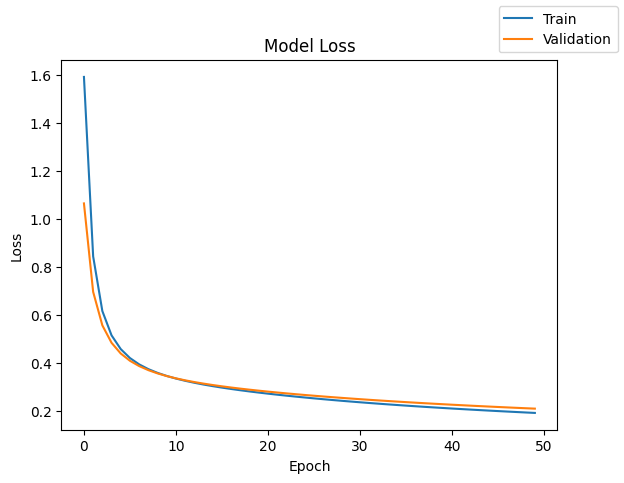

In [ ]:
plot(history,'loss')

- The train and validation loss are almost the same from the 10th epoch, and a slight divergence is observed when nearing the 45th epoch.

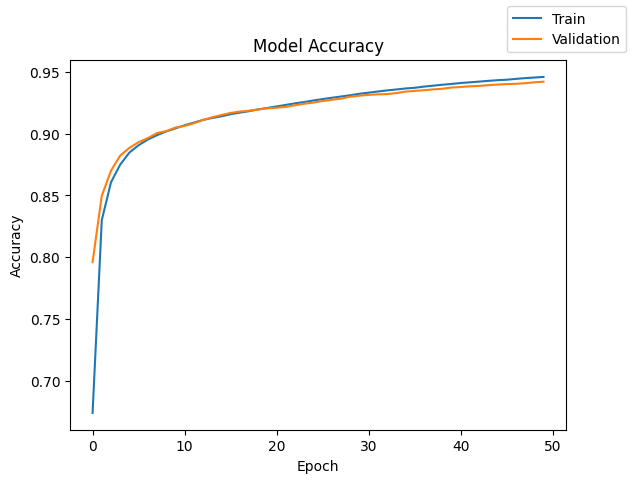

In [ ]:
plot(history,'accuracy')

- The train and validation accuracy are almost the same from the 10th epoch, and a slight divergence is observed when nearing the 45th epoch.

In [ ]:
results.loc[6] = [1,64,'sigmoid',50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.299113,2.290647,0.10612,0.1108,4.85
1,0,-,-,50,50000,1.938442,1.929622,0.45600,0.4678,15.66
2,0,-,-,10,32,0.327692,0.335881,0.90822,0.9064,78.58
3,0,-,-,50,32,0.272342,0.294275,0.92398,0.9191,368.07
4,0,-,-,50,64,0.290062,0.307138,0.91908,0.9150,174.01
5,1,64,sigmoid,50,50000,2.258370,2.258207,0.16014,0.1577,15.47
6,1,64,sigmoid,50,32,0.191278,0.209171,0.94566,0.9418,343.50


- We have now got the best model so far, with a 2% improvement compared to the previous best (index 3 vs index 6)
    - The time taken is also very similar

- So, we see that adding a hidden layer is helpful, provided we use a smaller batch size.

Now, let's try adding more neurons to the hidden layer.

### Model 7

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation='sigmoid',input_dim = x_train.shape[1]))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5291 - loss: 1.8801 - val_accuracy: 0.8016 - val_loss: 0.9807
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8250 - loss: 0.8556 - val_accuracy: 0.8495 - val_loss: 0.6447
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8623 - loss: 0.5964 - val_accuracy: 0.8702 - val_loss: 0.5231
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8801 - loss: 0.4930 - val_accuracy: 0.8815 - val_loss: 0.4604
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8869 - loss: 0.4372 - val_accuracy: 0.8873 - val_loss: 0.4222
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8935 - loss: 0.4023 - val_accuracy: 0.8923 - val_loss: 0.3965
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8971 - loss: 0.3783 - val_accuracy: 0.8972 - val_loss: 0.3779
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9001 - loss: 0.3606 -

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  262.76062273979187


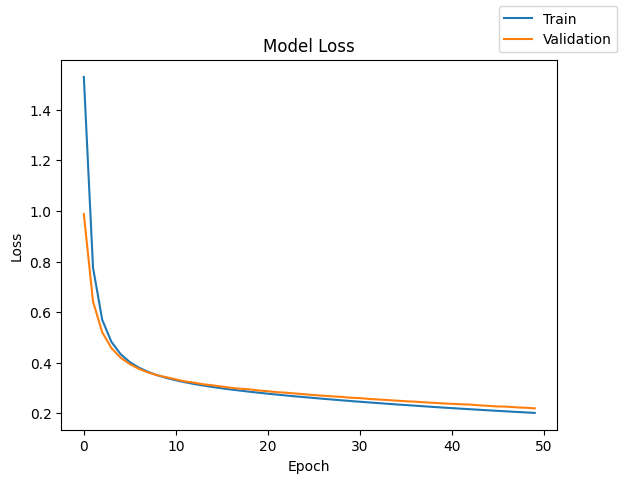

In [ ]:
plot(history,'loss')

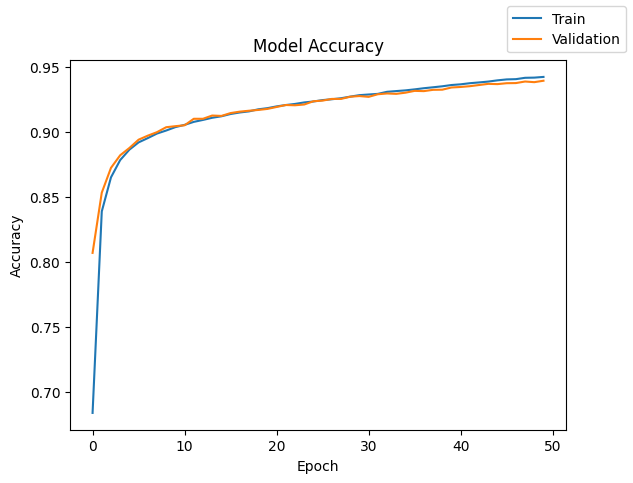

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[7] = [1,128,'sigmoid',50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,4.70
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,15.83
2,0,-,-,10,32,0.327727,0.337734,0.90836,0.9058,53.35
3,0,-,-,50,32,0.272078,0.293618,0.92408,0.9189,245.94
4,0,-,-,50,64,0.290504,0.307275,0.91948,0.9139,142.70
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,11.07
6,1,64,sigmoid,50,32,0.193491,0.211371,0.94566,0.9417,263.34
7,1,128,sigmoid,50,32,0.201477,0.219633,0.94234,0.9394,262.76


- Adding more neurons to the hidden layer hasn't help much
    - This is an observation for this dataset, might not be true for others


Another lever for us to change is the activation function for the hidden layer. Let's experiment with different activation functions.

### Model 8

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation='tanh',input_dim = x_train.shape[1]))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6618 - accuracy: 0.8313 - val_loss: 0.4197 - val_accuracy: 0.8868
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3724 - accuracy: 0.8971 - val_loss: 0.3522 - val_accuracy: 0.8998
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3279 - accuracy: 0.9073 - val_loss: 0.3258 - val_accuracy: 0.9075
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3032 - accuracy: 0.9137 - val_loss: 0.3058 - val_accuracy: 0.9137
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2852 - accuracy: 0.9188 - val_loss: 0.2901 - val_accuracy: 0.9170
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2700 - accuracy: 0.9225 - val_loss: 0.2791 - val_accuracy: 0.9206
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2566 - accuracy: 0.9270 - val_loss: 0.2673 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  322.9616904258728


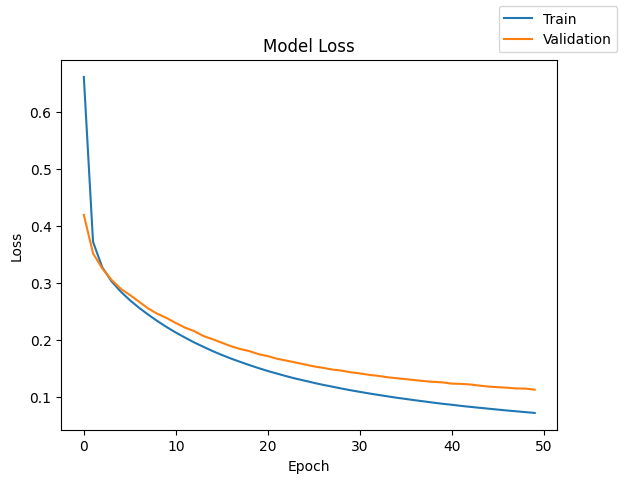

In [ ]:
plot(history,'loss')

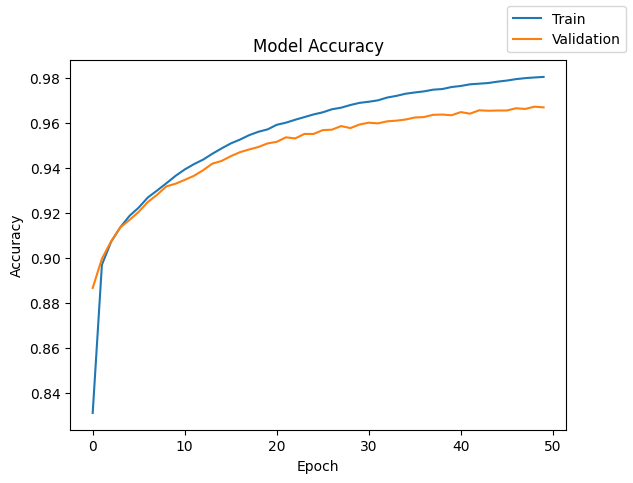

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[8] = [1,128,'tanh',50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,4.70
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,15.83
2,0,-,-,10,32,0.327727,0.337734,0.90836,0.9058,53.35
3,0,-,-,50,32,0.272078,0.293618,0.92408,0.9189,245.94
4,0,-,-,50,64,0.290504,0.307275,0.91948,0.9139,142.70
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,11.07
6,1,64,sigmoid,50,32,0.193491,0.211371,0.94566,0.9417,263.34
7,1,128,sigmoid,50,32,0.201477,0.219633,0.94234,0.9394,262.76
8,1,128,tanh,50,32,0.072022,0.112833,0.98052,0.9670,322.96


- With **tanh** as the activation function, we got a 4% improvement with the same time spent.

- Hence, it seems that the choice of activation function matters.

### Model 9

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation='relu',input_dim = x_train.shape[1]))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7343 - accuracy: 0.8169 - val_loss: 0.4117 - val_accuracy: 0.8866
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3586 - accuracy: 0.9002 - val_loss: 0.3317 - val_accuracy: 0.9074
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3067 - accuracy: 0.9133 - val_loss: 0.3006 - val_accuracy: 0.9171
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2765 - accuracy: 0.9218 - val_loss: 0.2754 - val_accuracy: 0.9235
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2537 - accuracy: 0.9284 - val_loss: 0.2563 - val_accuracy: 0.9284
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2348 - accuracy: 0.9346 - val_loss: 0.2426 - val_accuracy: 0.9323
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2189 - accuracy: 0.9388 - val_loss: 0.2277 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  271.62226390838623


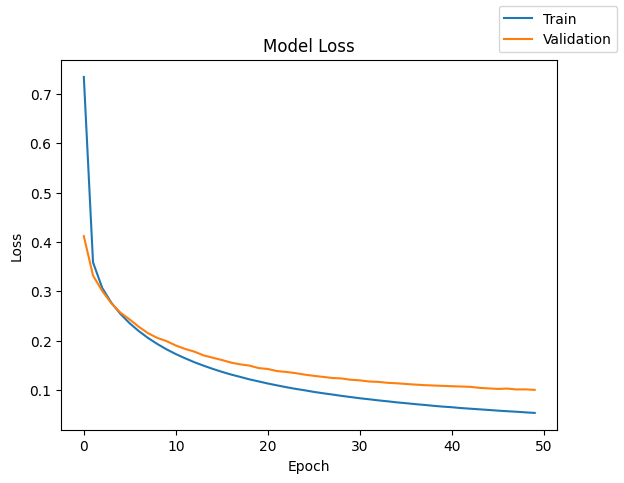

In [ ]:
plot(history,'loss')

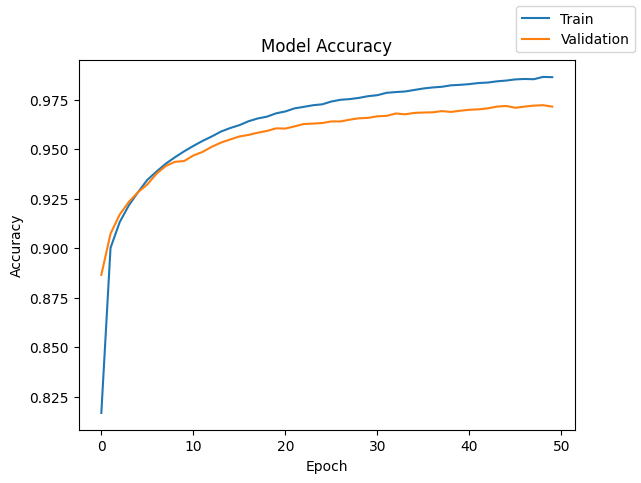

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[9] = [1,128,'relu',50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,4.70
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,15.83
2,0,-,-,10,32,0.327727,0.337734,0.90836,0.9058,53.35
3,0,-,-,50,32,0.272078,0.293618,0.92408,0.9189,245.94
4,0,-,-,50,64,0.290504,0.307275,0.91948,0.9139,142.70
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,11.07
6,1,64,sigmoid,50,32,0.193491,0.211371,0.94566,0.9417,263.34
7,1,128,sigmoid,50,32,0.201477,0.219633,0.94234,0.9394,262.76
8,1,128,tanh,50,32,0.072022,0.112833,0.98052,0.9670,322.96
9,1,128,relu,50,32,0.053518,0.100211,0.98646,0.9716,271.62


- With **relu** as the activation function, the performance improved slightly (~0.6%)

- Experimenting with different activation functions has helped

- This shows that activation functions is indeed a lever that one can change to try and improve  the overall model performance.
    - In our case, out of tanh, relu, and sigmoid, tanh and relu perform better than sigmoid

Now, let's try adding one more hidden layer to our neural network. We'll choose relu and tanh as the activation functions for it.

### Model 10

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation='relu',input_dim = x_train.shape[1]))
model.add(Dense(64,activation='tanh'))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6874 - accuracy: 0.8269 - val_loss: 0.3674 - val_accuracy: 0.9010
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3137 - accuracy: 0.9131 - val_loss: 0.2820 - val_accuracy: 0.9212
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2547 - accuracy: 0.9275 - val_loss: 0.2468 - val_accuracy: 0.9307
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2205 - accuracy: 0.9368 - val_loss: 0.2195 - val_accuracy: 0.9369
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1961 - accuracy: 0.9430 - val_loss: 0.1996 - val_accuracy: 0.9412
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1769 - accuracy: 0.9490 - val_loss: 0.1864 - val_accuracy: 0.9450
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1615 - accuracy: 0.9535 - val_loss: 0.1748 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  283.7359175682068


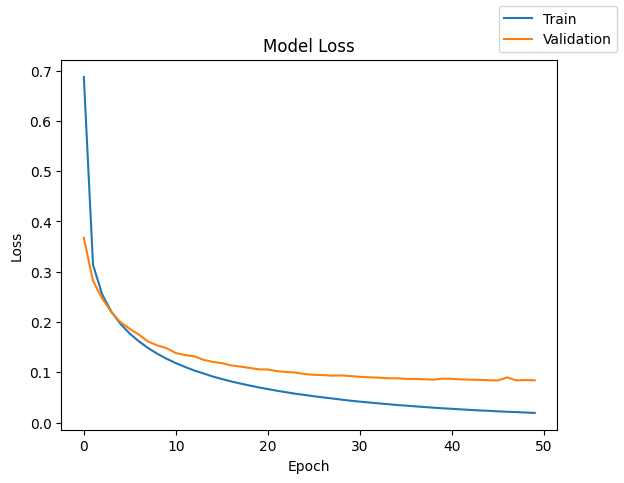

In [ ]:
plot(history,'loss')

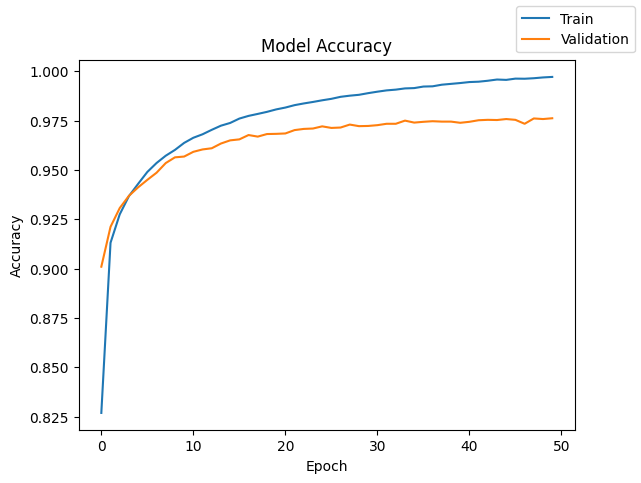

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[10] = [2,[128,64],['relu','tanh'],50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,4.70
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,15.83
2,0,-,-,10,32,0.327727,0.337734,0.90836,0.9058,53.35
3,0,-,-,50,32,0.272078,0.293618,0.92408,0.9189,245.94
4,0,-,-,50,64,0.290504,0.307275,0.91948,0.9139,142.70
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,11.07
6,1,64,sigmoid,50,32,0.193491,0.211371,0.94566,0.9417,263.34
7,1,128,sigmoid,50,32,0.201477,0.219633,0.94234,0.9394,262.76
8,1,128,tanh,50,32,0.072022,0.112833,0.98052,0.9670,322.96
9,1,128,relu,50,32,0.053518,0.100211,0.98646,0.9716,271.62


- Adding another layer with the best activation has slightly improved (~1%) the accuracy of the model.

- This increase is not only due to the addition of a new hidden layer but collectively depends on a set of carefully chosen hyperparameters (batch size, hidden layer activation, # hidden layers, # neurons in the hidden layer).

- The order of the activations of the hidden layers might matter.
- We have tried using relu activation for first hidden layer and tanh activation for the second hidden layer
- Let's try reversing the order

### Model 11

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation='tanh',input_dim = x_train.shape[1]))
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6736 - accuracy: 0.8268 - val_loss: 0.3735 - val_accuracy: 0.8938
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3229 - accuracy: 0.9069 - val_loss: 0.2985 - val_accuracy: 0.9139
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2719 - accuracy: 0.9206 - val_loss: 0.2683 - val_accuracy: 0.9225
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2407 - accuracy: 0.9295 - val_loss: 0.2410 - val_accuracy: 0.9281
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2172 - accuracy: 0.9366 - val_loss: 0.2226 - val_accuracy: 0.9332
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1982 - accuracy: 0.9425 - val_loss: 0.2087 - val_accuracy: 0.9396
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1823 - accuracy: 0.9470 - val_loss: 0.1955 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  322.8284864425659


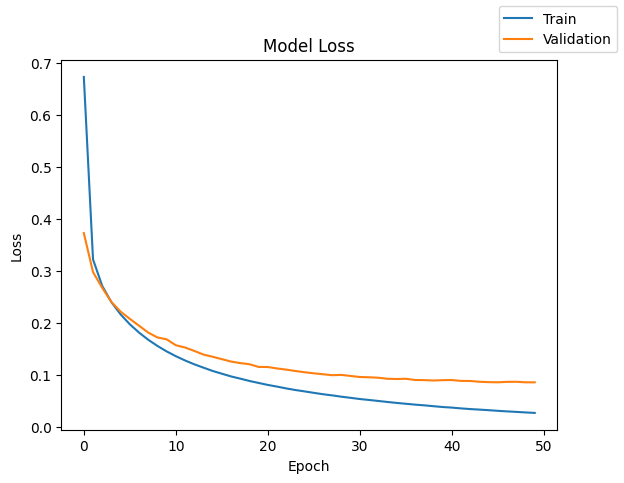

In [ ]:
plot(history,'loss')

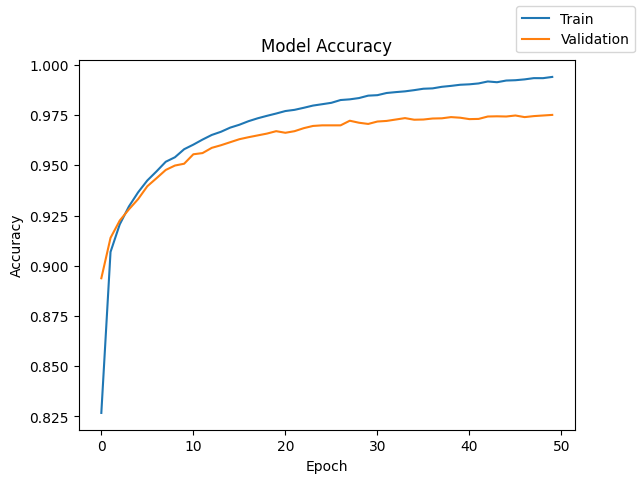

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[11] = [2,[128,64],['tanh','relu'],50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,4.70
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,15.83
2,0,-,-,10,32,0.327727,0.337734,0.90836,0.9058,53.35
3,0,-,-,50,32,0.272078,0.293618,0.92408,0.9189,245.94
4,0,-,-,50,64,0.290504,0.307275,0.91948,0.9139,142.70
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,11.07
6,1,64,sigmoid,50,32,0.193491,0.211371,0.94566,0.9417,263.34
7,1,128,sigmoid,50,32,0.201477,0.219633,0.94234,0.9394,262.76
8,1,128,tanh,50,32,0.072022,0.112833,0.98052,0.9670,322.96
9,1,128,relu,50,32,0.053518,0.100211,0.98646,0.9716,271.62


- The change in the order of activation has not yielded much different results

Let's try adding one more hidden layer with the best activation function (relu) we've seen.

### Model 12

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation='relu',input_dim = x_train.shape[1]))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
batch_size = 32
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7542 - accuracy: 0.7926 - val_loss: 0.3724 - val_accuracy: 0.8951
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3045 - accuracy: 0.9122 - val_loss: 0.2794 - val_accuracy: 0.9211
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2439 - accuracy: 0.9304 - val_loss: 0.2422 - val_accuracy: 0.9318
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2034 - accuracy: 0.9411 - val_loss: 0.2012 - val_accuracy: 0.9433
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1748 - accuracy: 0.9485 - val_loss: 0.1892 - val_accuracy: 0.9465
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1525 - accuracy: 0.9559 - val_loss: 0.1842 - val_accuracy: 0.9486
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1358 - accuracy: 0.9612 - val_loss: 0.1591 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  322.853972196579


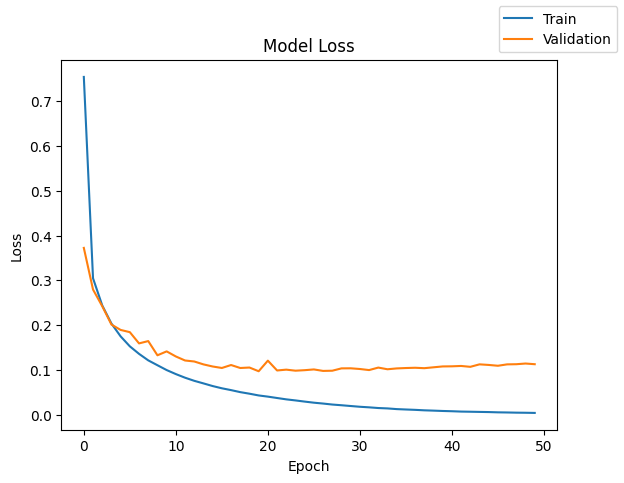

In [ ]:
plot(history,'loss')

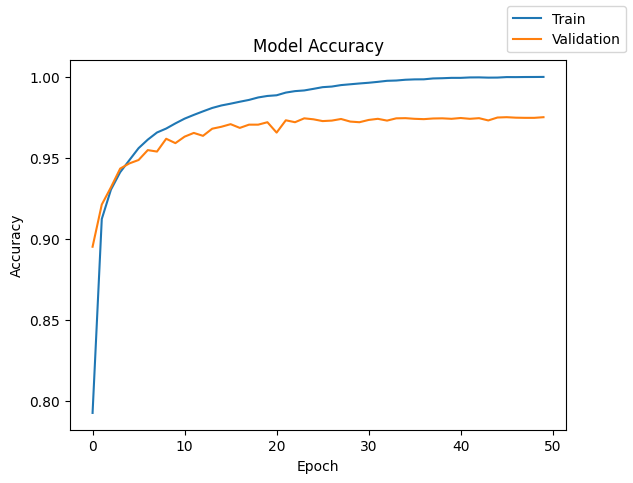

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[12] = [3,[128,64,32],['relu','relu','relu'],50,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,0,-,-,10,50000,2.255868,2.238811,0.15270,0.1628,4.70
1,0,-,-,50,50000,1.927448,1.924149,0.43060,0.4332,15.83
2,0,-,-,10,32,0.327727,0.337734,0.90836,0.9058,53.35
3,0,-,-,50,32,0.272078,0.293618,0.92408,0.9189,245.94
4,0,-,-,50,64,0.290504,0.307275,0.91948,0.9139,142.70
5,1,64,sigmoid,50,50000,2.268767,2.266936,0.14812,0.1541,11.07
6,1,64,sigmoid,50,32,0.193491,0.211371,0.94566,0.9417,263.34
7,1,128,sigmoid,50,32,0.201477,0.219633,0.94234,0.9394,262.76
8,1,128,tanh,50,32,0.072022,0.112833,0.98052,0.9670,322.96
9,1,128,relu,50,32,0.053518,0.100211,0.98646,0.9716,271.62


- The model's performance improved slightly (~0.5%)

Let's increase the number of epochs further to see what happens.

### Model 13

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation='relu',input_dim = x_train.shape[1]))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
batch_size = 32
epochs = 100
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7175 - accuracy: 0.7942 - val_loss: 0.3519 - val_accuracy: 0.8989
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2896 - accuracy: 0.9152 - val_loss: 0.2568 - val_accuracy: 0.9272
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2273 - accuracy: 0.9334 - val_loss: 0.2181 - val_accuracy: 0.9366
Epoch 4/100
1563/1563 [==============================] - 5s 4ms/step - loss: 0.1874 - accuracy: 0.9455 - val_loss: 0.1833 - val_accuracy: 0.9463
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1596 - accuracy: 0.9533 - val_loss: 0.1668 - val_accuracy: 0.9508
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1389 - accuracy: 0.9597 - val_loss: 0.1590 - val_accuracy: 0.9549
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1232 - accuracy: 0.9645 - val_loss: 0.1415 - val_ac

In [ ]:
print("Time taken in seconds ",end-start)

In [ ]:
plot(history,'loss')

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[13] = [3,[128,64,32],['relu','relu','relu'],100,32,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

- The training accuracy has reached it's peak (100% accurate)

- The validation accuracy doesn't appear to have changed much in the last few models we built
    - The validation accuracy seems to be in the range [0.9700 - 0.9760] in the last few models

- The time taken for 100 epochs, though, is almost double than before, which is expected.

## Conclusions

1. **Baseline Model:**
   - A baseline model with no hidden layers, using vanilla Gradient Descent, and run with 10 epochs yielded a low accuracy (less than 20%)

2. **Effect of Increasing Epochs:**
   - Increasing the number of epochs results in the model being trained for longer, resulting in improved training accuracy
   - It does take a longer time for execution, which is expected
   - It is important to note that while running more epochs improves training accuracy, it might not always yield a better validation accuracy. So, running a model for more epochs can lead to an overfit model

3. **Gradient Descent (GD) vs Stochastic Gradient Descent (SGD):**
   - Implementing Stochastic Gradient Descent involves using smaller batches of data to update the model parameters, which resulted in an improved rate of learning for the model. Consequently, we witnessed a largely better model accuracy (~90%) in fewer epochs compared to the baseline model

4. **Effect of Batch Size:**
   - Using a batch size of 32 or 64 did not result in a huge change in model accuracy compared to the use of the entire data as one batch.
   - As long as we choose a small batch size (like 32 or 64), we can expect an overall better model performance

5. **Effect of Adding a Hidden Layer:**
   - Adding a hidden layer to the baseline model did not improve the model performance largely, but using SGD along with the addition of a hidden layer yielded hugely better results than the baseline model

6. **Effect of Changing the Hidden Layer Activation Function:**
   - Changing the hidden layer activation has a notable effect on the model performance, with tanh and relu activations yielding better results than sigmoid activation

7. **Effect of Additional Hidden Layers:**
   - Adding more hidden layers (while using SGD and relu/tanh activation) yields slightly better performance than a model with only one hidden layer

**Note**: While the above points offer certain directions regarding how to update the configuration of a neural network for better results, one needs to experiment with different configurations and find the best model through trial and error in real-world scenarios.

<font size=6 color='blue'>Power Ahead</font>
___